<a href="https://colab.research.google.com/github/prateekbps/ML_Projects/blob/master/Telecom_Customer_Churn_(30_12_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns",30)

In [2]:
df = pd.read_excel("/content/drive/MyDrive/ML Project Data/Telecom Project/Telecom.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
# checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# dataset duplicate values
df.duplicated().sum()

0

In [6]:
# missing or null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


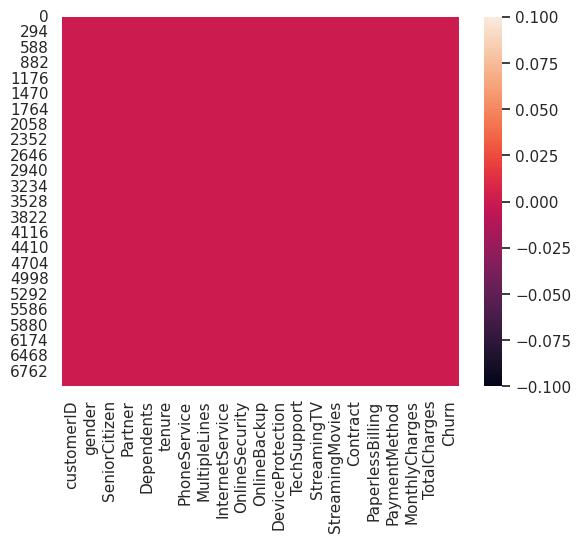

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
# Understandinfg dataset variables
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# describe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
# datatype
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [12]:
# Number misrepresented as object
df.TotalCharges

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [13]:
# dealing with blank data in the total charges column
df["TotalCharges"]  = df["TotalCharges"].replace(" ",np.nan)

In [14]:
# converting total charges to numerical type
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [15]:
# 11 missing rows in Total charges which have been set null post finding the blank data
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [16]:
df.isnull().sum()/len(df)*100

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


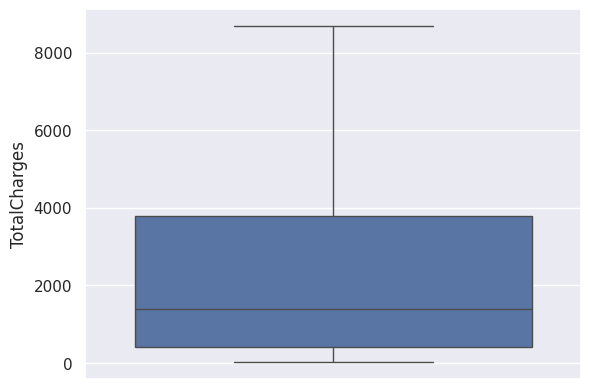

In [17]:
# Only 0.15% data in total charges is null
# Imputation post checking outliers
sns.boxplot(y='TotalCharges', data=df)
plt.show()

In [18]:
# imputation
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
# knn imputation method
# from sklearn.impute import KNNImputer # SimpleImputer
# imputer = KNNImputer()
# df_imputed = pd.DataFrame(imputer.fit_transform(df['variable name']), columns = df.columns)
# df_imputed.isnull().sum()

In [19]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
# Check unique values for each variable
for i in df.columns:
  print("No. of unique values in ", i, "is", df[i].nunique())

No. of unique values in  customerID is 7043
No. of unique values in  gender is 2
No. of unique values in  SeniorCitizen is 2
No. of unique values in  Partner is 2
No. of unique values in  Dependents is 2
No. of unique values in  tenure is 73
No. of unique values in  PhoneService is 2
No. of unique values in  MultipleLines is 3
No. of unique values in  InternetService is 3
No. of unique values in  OnlineSecurity is 3
No. of unique values in  OnlineBackup is 3
No. of unique values in  DeviceProtection is 3
No. of unique values in  TechSupport is 3
No. of unique values in  StreamingTV is 3
No. of unique values in  StreamingMovies is 3
No. of unique values in  Contract is 3
No. of unique values in  PaperlessBilling is 2
No. of unique values in  PaymentMethod is 4
No. of unique values in  MonthlyCharges is 1585
No. of unique values in  TotalCharges is 6531
No. of unique values in  Churn is 2


In [22]:
# data wrangling
print("No of customers churning: ", df[df['Churn']=='Yes'].Churn.count())
churn_df = df[df['Churn']=='Yes']
# customers with multiple sims from different operators
print("No of unique Multiple telecom customers :  ", df['MultipleLines'].nunique())

# internet service
print("No of customers with InternetService: ", df[df['InternetService']=='DSL']['InternetService'].count())

print("No of customers with Phone service: ", df[df['PhoneService']=='Yes']['PhoneService'].count())
churn_df

No of customers churning:  1869
No of unique Multiple telecom customers :   3
No of customers with InternetService:  2421
No of customers with Phone service:  6361


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [23]:
# % of total customer churning
print("Total no. of customer: ", df.Churn.count())
perc_churn = (len(churn_df)/len(df))*100
print(f"Percentage of customer churning: {round(perc_churn, 2)}%")

Total no. of customer:  7043
Percentage of customer churning: 26.54%


In [24]:
df['SeniorCitizen'].value_counts()*100.0/len(df)

,count
SeniorCitizen,
0,83.785319
1,16.214681


In [25]:
df['Partner'].value_counts()*100.0/len(df)

,count
Partner,
No,51.69672
Yes,48.30328


In [26]:
df['Dependents'].value_counts()*100.0/len(df)

,count
Dependents,
No,70.041176
Yes,29.958824


In [27]:
# Analyzing Target variable

In [28]:
# imbalanced dataset
df['Churn'].value_counts()*100.0/len(df)

,count
Churn,
No,73.463013
Yes,26.536987


In [29]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [30]:
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

In [31]:
# Feature engineering along with model building
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [32]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [33]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [34]:
x = pd.get_dummies(x, columns=['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [35]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [36]:
x.shape

(7043, 30)

In [37]:
# feature scaling Monthlycharges, total charges, tenure
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = ['tenure','MonthlyCharges', 'TotalCharges']
x[scaler_x] = scaler.fit_transform(x[scaler_x])

In [38]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [39]:
# Feature selection by importance
from sklearn.ensemble import RandomForestClassifier
rf_label= RandomForestClassifier()
rf_label.fit(x,y)
df1 = pd.DataFrame({"Feature":x.columns, "RF_importance": rf_label.feature_importances_}).sort_values(by='RF_importance', ascending=False)
df1

,Feature,RF_importance
3,TotalCharges,0.196628
1,tenure,0.173038
2,MonthlyCharges,0.170896
28,PaymentMethod_Electronic check,0.038023
10,InternetService_Fiber optic,0.037477
25,Contract_Two year,0.032967
4,gender_Male,0.027802
26,PaperlessBilling_Yes,0.026089
13,OnlineSecurity_Yes,0.025199
19,TechSupport_Yes,0.023247


In [40]:
# Feature selection by importance
from sklearn.ensemble import GradientBoostingClassifier
gb_label= GradientBoostingClassifier()
gb_label.fit(x,y)
df1 = pd.DataFrame({"Feature":x.columns, "gb_importance": gb_label.feature_importances_}).sort_values(by='gb_importance', ascending=False)
df1

,Feature,gb_importance
1,tenure,0.304816
10,InternetService_Fiber optic,0.196804
28,PaymentMethod_Electronic check,0.104930
25,Contract_Two year,0.080170
3,TotalCharges,0.068779
2,MonthlyCharges,0.064220
24,Contract_One year,0.059727
26,PaperlessBilling_Yes,0.019658
13,OnlineSecurity_Yes,0.017252
19,TechSupport_Yes,0.013227


In [41]:
# Feature selection by importance
from sklearn.tree import DecisionTreeClassifier
dt_label= DecisionTreeClassifier()
dt_label.fit(x,y)
df1 = pd.DataFrame({"Feature":x.columns, "dt_importance": dt_label.feature_importances_}).sort_values(by='dt_importance', ascending=False)
df1

,Feature,dt_importance
1,tenure,0.215443
3,TotalCharges,0.209674
2,MonthlyCharges,0.174325
10,InternetService_Fiber optic,0.108313
28,PaymentMethod_Electronic check,0.028329
4,gender_Male,0.026445
5,Partner_Yes,0.020011
0,SeniorCitizen,0.019575
6,Dependents_Yes,0.017643
9,MultipleLines_Yes,0.017174


In [42]:
# Common less imp: DeviceProtection_No internet service
x = x.drop(['DeviceProtection_No internet service'], axis=1)

In [43]:
x.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994971,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False


In [44]:
# Imbalance treadtment
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print("Original value count :", y.value_counts())
print("**************SMOTE Method***************")
print("After Smote value count :", y_smote.value_counts())

Original value count : Churn
0    5174
1    1869
Name: count, dtype: int64
**************SMOTE Method***************
After Smote value count : Churn
0    5174
1    5174
Name: count, dtype: int64


In [45]:
# Model Building
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 101,
                                                    stratify = y_smote)

In [46]:
# Traditional ML Algorithms
# RF, XGBoost, Logistic regression, SVM
# Deep learning algorithm
# H20.AI AutoML method- automation method

In [47]:
# Traditional apprach
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Evaluation Matrix
from sklearn.metrics import classification_report ,accuracy_score, confusion_matrix
print("************classification report ******************")
print(classification_report(y_train, y_pred_train))
print("*****************************")
print(classification_report(y_test, y_pred_test))

print("************Accuracy Score ******************")
print(accuracy_score(y_train, y_pred_train))
print("*****************************")
print(accuracy_score(y_test, y_pred_test))



************classification report ******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3881
           1       1.00      1.00      1.00      3880

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761

*****************************
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1293
           1       0.82      0.85      0.84      1294

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

************Accuracy Score ******************
0.9985826568741142
*****************************
0.8322381136451488


In [48]:
# XG Boost classifier
# Traditional apprach
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation Matrix
from sklearn.metrics import classification_report ,accuracy_score, confusion_matrix
print("************classification report ******************")
print(classification_report(y_train, y_pred_train))
print("*****************************")
print(classification_report(y_test, y_pred_test))

print("************Accuracy Score ******************")
print(accuracy_score(y_train, y_pred_train))
print("*****************************")
print(accuracy_score(y_test, y_pred_test))



************classification report ******************
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3881
           1       0.93      0.96      0.94      3880

    accuracy                           0.94      7761
   macro avg       0.94      0.94      0.94      7761
weighted avg       0.94      0.94      0.94      7761

*****************************
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1293
           1       0.80      0.84      0.82      1294

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

************Accuracy Score ******************
0.9418889318386806
*****************************
0.8179358330112099


In [49]:
# # XG boostr being a better model we can apply cross validation
# import sklearn
# import xgboost
# from sklearn.model_selection import cross_val_score
# training_accuracy = cross_val_score(xgb, x_train, y_train , cv = 10)
# print(training_accuracy.mean())
# print("*************************")
# print(training_accuracy.max())

In [50]:
# Deep Learning- Multi layer perceptron method

In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import *
from keras import Sequential

In [53]:
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6575 - loss: 0.6058 - val_accuracy: 0.7484 - val_loss: 0.5036
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7745 - loss: 0.4764 - val_accuracy: 0.7534 - val_loss: 0.4957
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7741 - loss: 0.4615 - val_accuracy: 0.7603 - val_loss: 0.4858
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7809 - loss: 0.4600 - val_accuracy: 0.7646 - val_loss: 0.4808
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7803 - loss: 0.4546 - val_accuracy: 0.7677 - val_loss: 0.4762
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7888 - loss: 0.4457 - val_accuracy: 0.7696 - val_loss: 0.4725
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7971 - loss: 0.4392 - val_accuracy: 0.7743 - val_loss: 0.4696
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8010 - loss: 0.4372 - val_accu

In [54]:
#H20 AutoML
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [55]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=fb18a5f48ebeb6f27918799b81395fd6aabb35d40bc24a784272766b47a96df4
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [59]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph9i_qccw
  JVM stdout: /tmp/tmph9i_qccw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmph9i_qccw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_ezhtzs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [62]:
# loading the dataset
dataset = h2o.import_file("/content/drive/MyDrive/ML Project Data/Telecom Project/Telecom.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [63]:
dataset.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [64]:
df_train, df_test = dataset.split_frame(ratios=[.8])

In [65]:
df_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [66]:
df_test

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.7,7382.25,No
1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.2,20.2,No
6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.9,7251.7,No
6575-SUVOI,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.5,1752.65,No
4667-QONEA,Female,1,Yes,Yes,60,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),74.85,4456.35,No
5698-BQJOH,Female,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.4,857.25,Yes


In [67]:
y = 'Churn' # dependent variable
x = dataset.columns
x.remove(y)

In [69]:
x.remove('customerID')

In [71]:
# building H2O AutoML Model
aml = H2OAutoML(max_runtime_secs=300, max_models=10, seed=10, verbosity='info', nfolds=2)

In [72]:
aml.train(x=x,y=y,training_frame=df_train)

AutoML progress: |
15:47:45.908: Project: AutoML_1_20250104_154745
15:47:45.909: Setting stopping tolerance adaptively based on the training frame: 0.013303802104754786
15:47:45.910: Build control seed: 10
15:47:45.911: training frame: Frame key: AutoML_1_20250104_154745_training_py_3_sid_a702    cols: 21    rows: 5650  chunks: 8    size: 271519  checksum: -3293332607529756034
15:47:45.911: validation frame: NULL
15:47:45.911: leaderboard frame: NULL
15:47:45.911: blending frame: NULL
15:47:45.911: response column: Churn
15:47:45.912: fold column: null
15:47:45.912: weights column: null
15:47:45.932: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [73]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20250104_154745,0.844483,0.416357,0.652848,0.234218,0.366726,0.134488
StackedEnsemble_AllModels_1_AutoML_1_20250104_154745,0.844062,0.416962,0.652189,0.240264,0.36714,0.134792
GLM_1_AutoML_1_20250104_154745,0.842301,0.419667,0.642733,0.238991,0.368501,0.135793
GBM_1_AutoML_1_20250104_154745,0.841759,0.419537,0.647611,0.235039,0.368194,0.135567
GBM_2_AutoML_1_20250104_154745,0.833536,0.429476,0.634224,0.241239,0.373765,0.1397
XGBoost_1_AutoML_1_20250104_154745,0.832407,0.435351,0.63542,0.238744,0.375053,0.140664
XGBoost_3_AutoML_1_20250104_154745,0.830108,0.440271,0.621015,0.244059,0.377222,0.142296
GBM_3_AutoML_1_20250104_154745,0.829832,0.433897,0.632064,0.246478,0.3749,0.14055
GBM_4_AutoML_1_20250104_154745,0.827445,0.437132,0.626434,0.247709,0.377394,0.142426
XRT_1_AutoML_1_20250104_154745,0.826174,0.435342,0.629694,0.249939,0.375914,0.141311


In [75]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [76]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20250104_154745',
 'StackedEnsemble_AllModels_1_AutoML_1_20250104_154745',
 'GLM_1_AutoML_1_20250104_154745',
 'GBM_1_AutoML_1_20250104_154745',
 'GBM_2_AutoML_1_20250104_154745',
 'XGBoost_1_AutoML_1_20250104_154745',
 'XGBoost_3_AutoML_1_20250104_154745',
 'GBM_3_AutoML_1_20250104_154745',
 'GBM_4_AutoML_1_20250104_154745',
 'XRT_1_AutoML_1_20250104_154745',
 'XGBoost_2_AutoML_1_20250104_154745',
 'DRF_1_AutoML_1_20250104_154745']

In [78]:
aml.leader.model_performance(df_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13476169671087349
RMSE: 0.36709902847988235
LogLoss: 0.4083957923125206
AUC: 0.8561003471192227
AUCPR: 0.6705981254948457
Gini: 0.7122006942384453
Null degrees of freedom: 1392
Residual degrees of freedom: 1388
Null deviance: 1631.1754792574875
Residual deviance: 1137.7906773826824
AIC: 1147.7906773826824

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27281782244816205
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     771   243    0.2396   (243.0/1014.0)
Yes    73    306    0.1926   (73.0/379.0)
Total  844   549    0.2268   (316.0/1393.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.272818     0.659483  229
max f2                       0.139526     0.773241  298
max f0point5                 0.506096     0.634198  122
max accuracy                 0.506096     0.799713  122
max precision                0.889507     1         0
max recall                   0.0474821    1         360
max specificity              0.889507     1         0
max absolute_mcc             0.272818     0.51705   229
max min_per_class_accuracy   0.294955     0.776134  219
max mean_per_class_accuracy  0.272818     0.783871  229
max tns                      0.889507     1014      0
max fns                      0.889507     378       0
max fps                      0.00657762   1014      399
max tps                      0.0474821    379       360
max tnr                      0.889507     1         0
max fnr                      0.889507     0.997361  0
max fpr                      0.00657762   1         399
max tpr                      0.0474821    1         360

Gains/Lift Table: Avg response rate: 27.21 %, avg score: 26.15 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100503                   0.822035           3.41293   3.41293            0.928571         0.849663   0.928571                    0.849663            0.0343008       0.0343008                  241.293   241.293            0.0333146
2        0.0201005                   0.797105           3.1504    3.28166            0.857143         0.80889    0.892857                    0.829276            0.0316623       0.0659631                  215.04    228.166            0.0630045
3        0.0301508                   0.779434           2.88786   3.1504             0.785714         0.78827    0.857143                    0.815607            0.0290237       0.0949868                  188.786   215.04             0.0890696
4        0.040201                    0.764046           2.88786   3.08476            0.785714         0.772273   0.839286                    0.804774            0.0290237       0.124011                   188.786   208.476            0.115135
5        0.0502513                   0.748851           3.1504    3.09789            0.857143         0.757246   0.842857                    0.795268            0.0316623       0.155673                   215.04    209.789            0.144825
6        0.100503                    0.639245           2.78285   2.94037            0.757143         0.697075   0.8                         0.746172            0.139842        0.295515                   178.285   194.037            0.267901
7        0.150036                    0.566298           2.1307    2.67306            0.57971          0.598579   0.727273          

In [79]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [80]:
output = h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

In [81]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [82]:
y_pred = aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [83]:
y_pred

predict,No,Yes
No,0.764729,0.235271
No,0.831688,0.168312
No,0.93358,0.0664198
No,0.93399,0.0660098
No,0.726812,0.273188
No,0.722224,0.277776
No,0.966109,0.033891
No,0.733941,0.266059
No,0.959112,0.0408882
Yes,0.30662,0.69338
